# Logistic Regression

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import sklearn
from collections import defaultdict
from tqdm.notebook import tqdm
from ipywidgets import interact
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import math

## Part 1 - Compute by hand

> Solve these exercises by hand and answer this questions on ILIAS.

### a) Sigmoid Function

During the lectures we derived the first derivative of the Logistic Function
\begin{align*}
  \sigma(z) &= \frac{1}{1+e^{-z}},\;z\in\mathbb{R}.
\end{align*}
We have verified, that the first derivative can be written as
\begin{align*}
  \sigma'(z) &= \sigma(z)\left(1-\sigma(z)\right),\;z\in\mathbb{R}.
\end{align*}

Using the above result show, that the second derivative can be
written as
\begin{align*}
  \sigma''(z) &= \sigma(z)\left(1-\sigma(z)\right)%
                 \left(1-2\sigma(z)\right),\;z\in\mathbb{R}.
\end{align*}

> Use the appropriate rules for differentiation in particular
the product, quotient and chain rule! Do this by hand!

### b) Partial Derivative

Compute (by hand) the following partial derivative
\begin{align*}
  \frac{\partial}{\partial\theta_k}\sigma\left(x^T\boldsymbol\theta\right),\;
    k=0,1,2,\ldots,m,
\end{align*}
where
\begin{align*}
  x^T\boldsymbol\theta &=
    \begin{bmatrix}
      x_0=1,\; x_1,\; x_2,\; \cdots,\; x_m
    \end{bmatrix}
    \begin{bmatrix}
      \theta_0\\\theta_1\\\theta_2\\\vdots\\\theta_m
    \end{bmatrix}
    \;=\; \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots \theta_m x_m.
\end{align*}
and $\sigma$ is the sigmoid function from above. Note: use
the derivative of $\sigma(z)$ from above.

### c) Derivative of Sigmoid

Compute $\sigma'(z)$ for $z=0$

### d) Sigmoid

Let $f(x) = \theta_0 + \theta_1x$ and $\sigma(x) = \frac{1}{1+e^{-f(x)}}$


For what value of x do we have  $\sigma(x) = \frac{1}{2}$ ?

### e) Maximal Value

What is a necessary condition for $\sigma'(x)$ to be maximal (i.e. $\sigma(x)$ has maximal slope)

Hint: Use $\sigma'(x)$ and $\sigma''(x)$

## Part 2 - 1D Toy example
Consider the case where random numbers are created by two different gaussian distributions with identical variance. We also know the labels from which distribution each number was originating from.

In [2]:
a = np.random.normal(5,0.7,100)
a[1:20]

array([5.7121024 , 5.97080116, 4.100518  , 5.32209749, 4.68097455,
       4.22207173, 5.962661  , 3.75891207, 5.25703814, 5.06155491,
       5.38093061, 5.54350319, 4.74510078, 5.26629494, 4.71201524,
       5.62248074, 5.93466934, 5.85538921, 5.45674662])

In [3]:
b = np.random.normal(2,0.7,100)
b[1:20]

array([1.92872425, 1.75156547, 2.45243103, 1.64494578, 2.64776935,
       1.91951687, 1.23290269, 2.71231036, 0.93541838, 2.39523882,
       0.19165937, 3.09153767, 1.15390867, 0.89139619, 1.32863116,
       1.90477047, 1.53538642, 2.20467753, 2.42825071])

To use this data for a logistic regression model, we combine the vectors $a$ and $b$ into a vector $X$ and create the corresponding labels $y$.

In [4]:
zeros = [0]*100
ones = [1]*100

X = np.concatenate((a,b))
y = np.concatenate((zeros,ones))

We plot both type of points in a scatter plot, where the points generated by the first distribution are plotted in blue have the label $y=0$, while the points of the second distribution are plotted in orange at $y=1$.

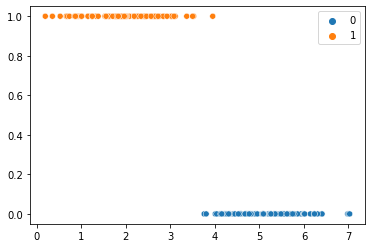

In [5]:
ax = sns.scatterplot(X, y, hue=y)

Now we would like to determine, if an arbitrary previously unseen point belongs rather to distribution 1 or two distribution 2. For that, we want to employ logistic regression. Similar to linear regression, we first consider a model with a single independent variable and two parameters $\theta_0$ and $\theta_1$.

The probability, that $x$ belongs to either of the two classes is determined using the sigmoid function.

$$
  \sigma(x) = \frac{1}{1+e^{-(\theta_0 + \theta_1x)}}
$$


> Implement the sigmoid function

In [6]:
def sigmoid(z):
    s = 1 / (1 + np.exp(z))
    return s

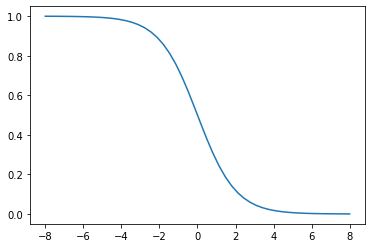

In [7]:
x = np.linspace(-8, 8)
plt.plot(x, sigmoid(x))

> Implement the `predict` function

In [8]:
def predict(X, theta0, theta1):
    return sigmoid((theta0 + theta1*X))

In [9]:
def predict(X, theta0, theta1):
    z = theta0 +  theta1 * X
    y_pred = sigmoid(z)
    return y_pred

In [10]:
theta0 = 1.0
theta1 = 1.0

y_pred = predict(X, theta0, theta1)
y_pred[0:20]

array([0.00380363, 0.00121463, 0.00093802, 0.00605668, 0.00179295,
       0.00339864, 0.00536718, 0.00094568, 0.00850203, 0.00191325,
       0.00232535, 0.00169068, 0.00143737, 0.00318821, 0.00189565,
       0.00329511, 0.00132836, 0.0009725 , 0.00105265, 0.00156743])

### Visualize Decision Boundary
The decision boundary is given by the x such that: $-\theta_0-\theta_1 x=0$.

We can solve this equation for x: $x=-\frac{\theta_0}{\theta_1}$
Now let us plot the decision boundary and the logistic function

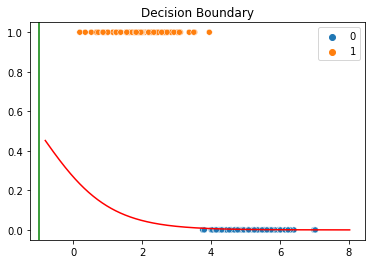

In [11]:
def plot_decision_boundary(X, theta0, theta1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.arange(X.min()-1, X.max()+1, 0.01).reshape(-1,1)
    y_pred = predict(x, theta0, theta1)
    ax.plot(x, y_pred, color="r")
    ax.axvline(-theta0/theta1, color="g")
    ax.set_title("Decision Boundary")
    
ax = sns.scatterplot(X, y, hue=y)
plot_decision_boundary(X, theta0, theta1, ax)
plt.show()

### Cost function
The cross-entropy cost function $J(\boldsymbol\theta)$, where $\boldsymbol\theta=\left(\theta_0,\theta_1\right)$ is given by

$$
    J(\boldsymbol\theta) =
      - \frac{1}{n} \sum_{i=1}^n%
        \left[y_i\log h(\boldsymbol\theta,\mathbf{X_i})
            + (1-y_i)\log\left(
               1-h(\boldsymbol\theta,\mathbf{X_i})\right)\right]
$$

where $h(\boldsymbol\theta,\mathbf{X_i})=\sigma\left(\mathbf{X_i}^T\boldsymbol\theta\right)=\sigma\left(\theta_0+\theta_1 x\right)$ and $\sigma$ is the sigmoid function.

> Implement the cost function. Verify your code by running the next cell.

In [12]:
def cost_function(y, y_pred):
    return (-1/len(y)) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))


If your code is correct, you should be able to run the following cell:

In [13]:
y_assert = np.array([1, 0, 0])
y_pred = np.array([0.98, 0.2, 0.6])

expected_cost = 0.38654566350196135
actual_cost = cost_function(y_assert, y_pred)

np.testing.assert_almost_equal(actual_cost, expected_cost, decimal=3)

### Gradients
For applying gradient descent, we define the gradient.

In [14]:
def gradient(X, y, theta0, theta1):
    y_pred = predict(X, theta0, theta1)
    diff = y_pred - y
    
    n = len(X)
    grad_theta0 = np.sum(diff) / n
    grad_theta1 = np.dot(diff, X.T) / n
    
    return grad_theta0, grad_theta1

### Gradient Descent
Now we are ready to determine the optimal values for the parameters $\theta_0$ and $\theta_1$ using the gradient descent algorithm.


$$
\mathbf{Repeat}\;\mathrm{(until}\;\mathrm{convergence)} \left\{\right.
  \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\\
      \boldsymbol\theta_{k+1} = \boldsymbol\theta_{k}-\alpha\frac{1}{n}\sum_{i=1}^n
          \left(h(\boldsymbol\theta_k,\mathbf{x}^{(i)})-y^{(i)}\right)\mathbf{x}^{(i)},
          \quad k = 0,\,1,\,2,\,3,\,\ldots,\mathtt{kmax}\\
    \left.\right\}\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad
$$



> Implement the `fit` function

In [15]:
def fit(X, y, alpha, num_epochs, display_every=10):
    theta0 = 0.0
    theta1 = np.random.randn()
    
    hist = defaultdict(list)
    for i in tqdm(range(num_epochs)):
        # calculate gradients
        grad_theta0, grad_theta1 = gradient(X, y, theta0, theta1)
        
        # update model parameters theta0 and theta1
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1
        
        # calculate the current costs
        y_pred = predict(X, theta0, theta1)
        curr_cost = cost_function(y, y_pred)
        
        hist["cost"].append(curr_cost)
        hist["theta0"].append(theta0)
        hist["theta1"].append(theta1)
        
        if i == 0 or (i+1) % display_every == 0:
            print("Epoch {} -  cost: {}".format(i+1, curr_cost))
        
    return theta0, theta1, hist

In [16]:
def fit(X, y, alpha, num_epochs, display_every=10):
    theta0 = 0.0
    theta1 = np.random.randn()
    
    hist = defaultdict(list)
    for i in tqdm(range(num_epochs)):
        # calculate gradients
        grad_theta0, grad_theta1 = gradient(X, y, theta0, theta1)
        
        # update model parameters theta0 and theta1
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1
        
        # calculate the current costs
        y_pred = predict(X, theta0, theta1)
        curr_cost = cost_function(y, y_pred)
        
        hist["cost"].append(curr_cost)
        hist["theta0"].append(theta0)
        hist["theta1"].append(theta1)
        
        if i == 0 or (i+1) % display_every == 0:
            print("Epoch {} -  cost: {}".format(i+1, curr_cost))
        
    return theta0, theta1, hist

#### Plot validation curve
We implement a function that allows us to plot the validation curve.

In [17]:
def plot_validation_curve(costs, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_ylabel("Cost")
    ax.set_title("Validation Curve")
    ax.set_xlabel("Epochs")
    ax.plot(costs)

#### Run gradient descent algorithm
Let's run the gradient descent algorithm!

Epoch 1 -  cost: 0.8149109086889952
Epoch 1000 -  cost: nan
Epoch 2000 -  cost: nan
Epoch 3000 -  cost: nan


<ipython-input-6-0bb4a2a495cc>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(z))
<ipython-input-12-80c256545a2f>:2: RuntimeWarning: divide by zero encountered in log
  return (-1/len(y)) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-12-80c256545a2f>:2: RuntimeWarning: invalid value encountered in multiply
  return (-1/len(y)) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))


Epoch 4000 -  cost: nan
Epoch 5000 -  cost: nan
Epoch 6000 -  cost: nan
Epoch 7000 -  cost: nan
Epoch 8000 -  cost: nan
Epoch 9000 -  cost: nan
Epoch 10000 -  cost: nan



<ipython-input-6-0bb4a2a495cc>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(z))


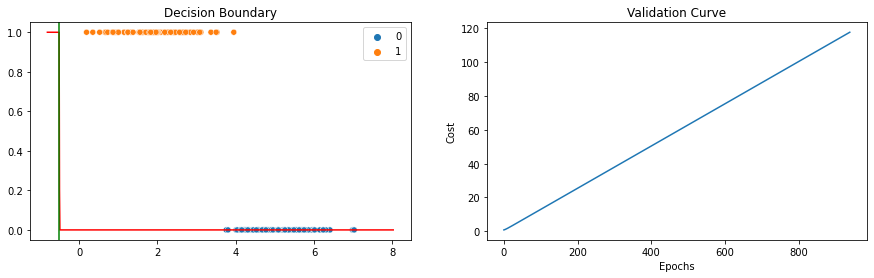

In [18]:
alpha = 0.1
num_epochs = 10000

theta0, theta1, hist = fit(X, y, alpha, num_epochs, display_every=1000)

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.scatterplot(X, y, hue=y, ax=ax[0])
plot_decision_boundary(X, theta0, theta1, ax[0])
plot_validation_curve(hist["cost"], ax=ax[1])

### Visualize Learning 
Let's visualize how the decision boundary changes over time.

In [19]:
@interact(epoch=(0, len(hist["theta0"]), 100))
def visualize_learning(epoch=100):
    ax = sns.scatterplot(X, y, hue=y)
    if epoch == 0:
        epoch += 1
    plot_decision_boundary(X, hist["theta0"][epoch-1], hist["theta1"][epoch-1], ax)
    plt.show()


interactive(children=(IntSlider(value=100, description='epoch', max=10000, step=100), Output()), _dom_classes=…

### Metrics
Let's calculate the accuracy

In [20]:
y_pred = predict(X, theta0, theta1)
y_pred[0:10]

<ipython-input-6-0bb4a2a495cc>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(z))


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We label a point as 1 if the predicted value is larger than 0.5

In [21]:
y_pred_class = y_pred > 0.5

In [22]:
y_pred_class = y_pred > 0.5

In [23]:
accuracy = accuracy_score(y, y_pred_class)

print("Accuracy: ", accuracy)

Accuracy:  0.5


## Part 3 - Multiple Logistic Regression - Toy example

In [24]:
df = pd.read_csv("classification_data.csv", header=None)
df.head()

,0,1,2
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


In [25]:
n = len(df)
X = df.values[:, 0:2]
y = df.values[:,2]

### Predict function
The first step is to modify our `predict` function to handle multiple thetas.

In [26]:
def predict(X, bias, thetas):
    z = bias + np.dot(X, thetas)
    y_pred = sigmoid(z)
    return y_pred

In [27]:
def predict(X, bias, thetas):
    z = bias + np.dot(X, thetas)
    y_pred = sigmoid(z)
    return y_pred

### Gradient function
Let's modify the `gradient` function.

In [28]:
def gradient(X, y, bias, thetas):
    y_pred = predict(X, bias, thetas)
    diff = y_pred - y
    
    n = len(X)
    grad_bias = np.sum(diff) / n
    grad_thetas = np.dot(diff, X) / n
    
    return grad_bias, grad_thetas

In [29]:
def gradient(X, y, bias, thetas):
    y_pred = predict(X, bias, thetas)
    diff = y_pred - y
    
    n = len(X)
    grad_bias = np.sum(diff) / n
    grad_thetas = np.dot(diff, X) / n
    
    return grad_bias, grad_thetas

### Gradient descent algorithm


In [30]:
def fit(X, y, alpha, num_epochs, display_every=100):
    bias = 0.0
    thetas = np.random.randn(*(1, X.shape[1])).reshape(-1)
        
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs+1)):
        # calculate gradients
        grad_bias, grad_thetas = gradient(X, y, bias, thetas)
        
        # update model parameters
        bias = bias - alpha * grad_bias
        thetas = thetas - alpha * grad_thetas
        
        # calculate the current costs
        y_pred = predict(X, bias, thetas)
        curr_cost = cost_function(y, y_pred)
        
        hist["cost"].append(curr_cost)
        
        if epoch % display_every == 0:
            print("Epoch {} -  cost: {}".format(epoch, curr_cost))
        
    return bias, thetas, hist

### Apply Gradient Descent
> Apply the gradient descent algorithm and answer the question on ILIAS. Use the learning rate 0.1. Plot the validation curve.

<ipython-input-12-80c256545a2f>:2: RuntimeWarning: divide by zero encountered in log
  return (-1/len(y)) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-12-80c256545a2f>:2: RuntimeWarning: invalid value encountered in multiply
  return (-1/len(y)) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))


Epoch 1000 -  cost: nan
Epoch 2000 -  cost: nan
Epoch 3000 -  cost: nan
Epoch 4000 -  cost: nan
Epoch 5000 -  cost: nan
Epoch 6000 -  cost: nan
Epoch 7000 -  cost: nan
Epoch 8000 -  cost: nan
Epoch 9000 -  cost: nan
Epoch 10000 -  cost: nan



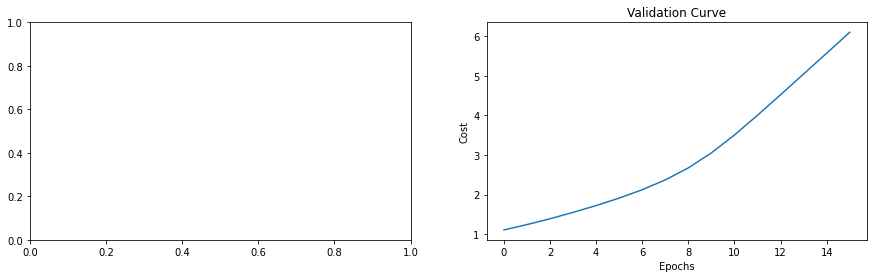

In [31]:
alpha = 0.1
num_epochs = 10000

theta0, theta1, hist = fit(X, y, alpha, num_epochs, display_every=1000)

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
plot_validation_curve(hist["cost"], ax=ax[1])

### Plot decision boundary

In [32]:
print("decision boundary: %.3f + %.3f * x1 + %.3f * x2 = 0"
      % (bias, thetas[0], thetas[1]))

x1 = np.array(X[:,0].T); x2 = np.array(X[:,1].T)

fig, ax = plt.subplots(1,1, figsize=(10,10))
color = ['blue' if l == 0 else 'green' for l in y]
scat = ax.scatter(x1, x2, color=color)

# inline function for decision boundary (unless vertical)
y_ = lambda x: ((-1)*(bias + thetas[0]*x) / thetas[1])

def plot_line(y, data_pts):
    x_vals = [i for i in
              range(int(min(data_pts)-1),
                    int(max(data_pts))+2)]
    y_vals = [y(x) for x in x_vals]
    plt.plot(x_vals,y_vals, 'r')

plot_line(y_, x1)
plt.show()

NameError: name 'bias' is not defined

## Part 4 - Skinapp Dataset
Finally, we want to apply logistic regression to a larger problem set. You are given data from [Skinapp](https://www.hslu.ch/en/lucerne-university-of-applied-sciences-and-arts/research/projects/detail/?pid=3600), our computer-aided detection of hand eczema. Your task is to implement a classifier that can distinguish the two classes given in the data (eczema or no eczema).

In [33]:
df = pd.read_csv("skin_disease.csv")
df.head()

,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,0,0.0,1.0,145.589218,136.262619,89.286194,1.444699,1.121440,6.850170,-0.416775,-0.961082,-3.694071,1.782547,1.507777,8.454105
1,0,0.0,1.0,145.745285,136.358490,89.779877,1.527904,1.150789,6.972225,0.259111,-0.973702,-4.002241,1.891008,1.542660,8.602075
2,0,0.0,1.0,145.902649,136.442474,90.168144,1.612806,1.174493,6.978986,0.429408,-0.974900,-4.450916,1.988215,1.577558,8.610969
3,0,0.0,1.0,146.033340,136.516663,90.452774,1.659652,1.190121,6.952057,-0.541607,-0.988754,-4.659405,2.026301,1.597203,8.615275
4,0,0.0,1.0,146.152237,136.569550,90.808395,1.696972,1.185440,6.971071,-0.723738,-1.007998,-4.903327,2.068065,1.599503,8.667152


### Data Analysis
As you can see above, this time we don't have human-interpretable features. The features in this dataset represent measures extracted from the images that the Skinapp has taken. But even without the possibility of applying domain knowledge to a problem, you can get surprisingly far if you are skilled at Machine Learning.


Let's look at the dataset, only briefly this time.
> Create some summary statistics.

In [34]:
df.describe()

,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
count,499999.000000,499999.0,4.999990e+05,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000
mean,0.093200,0.0,1.000000e+00,146.815527,141.458788,134.996175,1.266770,1.632642,7.903901,-0.145616,-0.285666,-1.929655,1.711098,2.202060,10.275562
std,0.290713,0.0,9.703904e-09,1.450870,2.808229,18.520121,0.434302,0.580858,3.958561,1.015346,1.288600,6.193878,0.574160,0.822267,4.846252
min,0.000000,0.0,9.999999e-01,141.318130,133.897079,71.165451,0.417716,0.466091,1.757523,-3.597640,-4.490906,-25.842232,0.657938,0.713408,2.433736
25%,0.000000,0.0,1.000000e+00,145.934570,139.441406,123.507439,0.971140,1.209888,5.000244,-0.870961,-1.143820,-5.844043,1.305725,1.613639,6.727772
50%,0.000000,0.0,1.000000e+00,146.704346,141.876266,138.149323,1.182131,1.538901,6.696691,-0.379821,-0.526745,-2.924497,1.584437,2.052280,8.934938
75%,0.000000,0.0,1.000000e+00,147.706131,143.578827,149.980957,1.464387,1.937054,9.972889,0.706714,0.844300,3.217888,1.991333,2.606397,12.674160
max,1.000000,0.0,1.000000e+00,151.490784,148.593094,169.480667,3.899983,4.709981,27.088278,2.905788,2.849722,19.004612,4.942104,6.219047,33.652348


In [ ]:
df.describe()

How does the target variable look? Check how many classes and how many values per class here are.

In [35]:
df["class"].value_counts()

0    453399
1     46600
Name: class, dtype: int64

So we have a binary classification problem with the two labels 0 and 1. And the class labels are not evenly distributed. We will try to use accuracy later and see that this is not advisable in this case.

> One of the features can be dropped. Find the feature and drop it.

In [36]:
# the feature t0 is constant and thus won't help with classification
df.drop('t0', axis=1, inplace=True)

In [ ]:
# the feature t0 is constant and thus won't help with classification
df.drop('t0', axis=1, inplace=True)

There is another feature that looks suspicious. Try to find out what is going on.

In [37]:
# t1 looks also somewhat constant, but not quite
# check how many values that column has
df.t1.nunique()

2

In [38]:
# Now show those two values
df.t1.value_counts()

1.0    486373
1.0     13626
Name: t1, dtype: int64

In [39]:
# Huh? Two kinds of values, both 1.0?
# That suspiciously looks like a floating point rounding error.
df.t1.dtype

dtype('float64')

In [40]:
# Show some values without rounding
df.t1.head().tolist()

[1.0, 0.9999999404, 1.0, 1.0, 1.0]

The difference might be significant. Not in the numerical sense, but in the sense that there actually is a difference. This should be further investigated by getting information about what that column signifies, e.g. from the Skinapp developers or the person that collected the data.

If that investigation shows significance, then it might be a good idea to convert this feature into a categorical feature to make the difference more significant to algorithms that use distance or similarity (such as logistic regression). Tree-based algorithms don't care, they can make their split at 0.99999999999 for example and thus capture the difference between those two values easily.

> Since we cannot do this investigation in the scope of this exercise, let's simply delete the feature.

In [41]:
df.drop(['t1'], axis=1, inplace=True)

In [ ]:
df.drop(['t1'], axis=1, inplace=True)

Furthermore, we see from the summary statistics that the scales differ, so for distance or similarity-based algorithms such as logistic regression or knn, we need to scale the data. We will do that later.

Finally let's plot the distributions of the features.

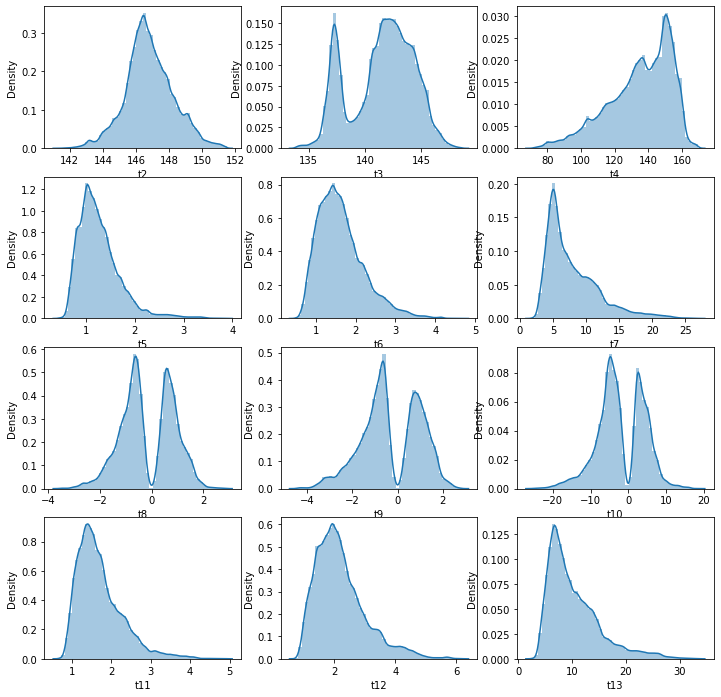

In [42]:
fig, axes = plt.subplots(4, 3, figsize=(12,12)) # make 4*3 little plots
columns = df.iloc[:, 1:].columns # skip the target
ax_indices = [(x, y) for x, y in np.ndindex(axes.shape)] # distplot wants the plots indicated as two-tuples

for col, ax_index in zip(columns, ax_indices):
    sns.distplot(df[col], ax=axes[ax_index])

plt.show()

And finally we create a boxplot to show outliers

t2         AxesSubplot(0.125,0.71587;0.227941x0.16413)
t3      AxesSubplot(0.398529,0.71587;0.227941x0.16413)
t4      AxesSubplot(0.672059,0.71587;0.227941x0.16413)
t5        AxesSubplot(0.125,0.518913;0.227941x0.16413)
t6     AxesSubplot(0.398529,0.518913;0.227941x0.16413)
t7     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
t8        AxesSubplot(0.125,0.321957;0.227941x0.16413)
t9     AxesSubplot(0.398529,0.321957;0.227941x0.16413)
t10    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
t11          AxesSubplot(0.125,0.125;0.227941x0.16413)
t12       AxesSubplot(0.398529,0.125;0.227941x0.16413)
t13       AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

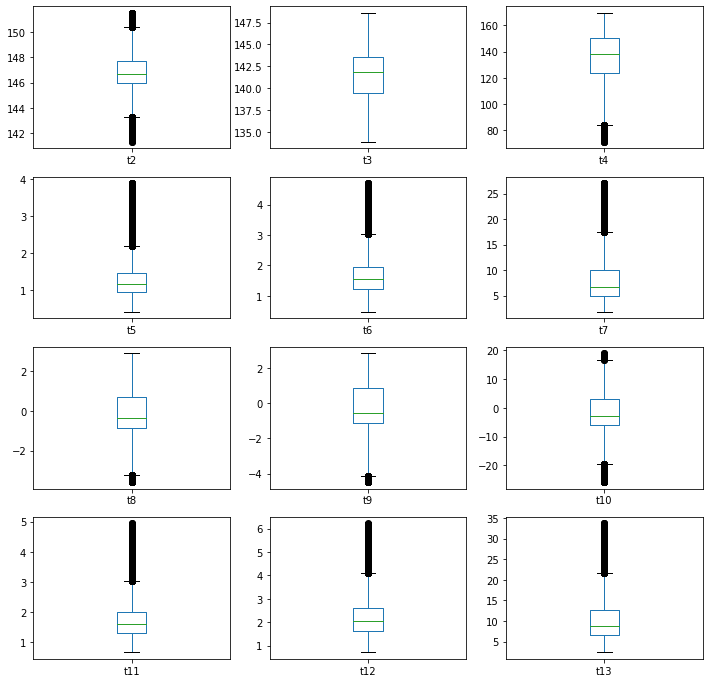

In [43]:
df.iloc[:, 1:].plot(kind='box', subplots=True, layout=(4, 3), figsize=(12, 12), sharex=False)

We leave the outliers for now. Later on, we will use a scaling method that helps dealing with outliers for the classifiers that are negatively affected by them (e.g. Logistic Regression but not Support Vector Machines and Tree-based methods).

### Split the data
We split the labels from the features


In [44]:
X = df.drop(columns=["class"])
y = df["class"]

we split the data into training and test set

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (399999, 12)
y_train: (399999,)


### Scale the data
We scale with Scikit-Learns [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html), which mitigates the Outlier problem somewhat.

> Fit a logistic regression model

In [46]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fit a Logistic Regression model
> fit a scikit-learn [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model to our training data.

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

### Evaluation
How should we evaluate our result? Of course this is highly dependent on both our original business problem and the data at hand. Questions such as
* Does the evaluation result need to be explainable to management, without using formulas and technical terms?
* Do we have a high class imbalance?
* Are False Positives and False Negatives equally bad? Does one of the two incur a high cost for our business and needs to be avoided?
* How do we rate the confidence? Do we want to penalise a classifier when it classifies a sample wrongly but is very sure of this result?

We will look at the metrics Accuracy and F1-Score.

> Predict the data on the test set.

In [ ]:
y_pred = model.predict(X_test)

#### Confusion Matrix
First we plot the confusion matrix

In [ ]:
def plot_confusion_matrix(cm):
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['True', 'False'],
                yticklabels=['True', 'False'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

> Finally Calculate the accuracy and the f1 score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print ("accuracy:", accuracy)
print ("f1 score:", f1)

## Part 5 - Zoo Animal Classification (Optional)

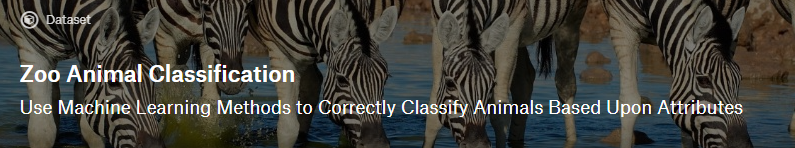

On [kaggle](https://www.kaggle.com/uciml/zoo-animal-classification/) there exists the zoo animal classification dataset. Your task is to build a logistic regression model to predict the class of an animal given its features.

### Read the dataset

> Read the dataset **zoo.csv** and print the first 5 rows.

In [ ]:
df = pd.read_csv("zoo.csv")
df.head()

### Data Quality Asssessment

#### Check for duplicates
> Print the number of duplicates and drop them if there are any.

In [ ]:
df.duplicated().any()

> Plot the distribution of the classes. Which class hast the most animals?

In [ ]:
sns.factorplot('class_name', data=df, kind="count", aspect=2)

#### Examine the legs feature
If we would classify an animal only based on the number of legs, to what class would an animal with 6 legs most certainly be assigned?
> Plot a histogram of the legs for each class. 

In [ ]:
# checking leg number in each class
g = sns.FacetGrid(df, col="class_name")
g.map(plt.hist, "legs")
plt.show()

#### Look at the mean of the features for each classs

In [ ]:
df.groupby(['class_name', 'class']).mean()

### Fit a Logistic Regression model

Now that you have ensured the quality of the dataset. Let's fit a logistic regression model
> Split the data into features and targets. Make sure not to use the *class*, *class_name* or *animal_name* as features. The target of our model is the column *class*.

In [ ]:
X = df.drop(columns=["class", "class_name", "animal_name"])
y = df["class"]

> Now split the data into a training and test set (80/20). To ensure repreducability, use `random_state=42`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Fit a logistic regression model. Use the option `multi_class='ovr'`

*Note*: With the option `multi_class='ovr'` a binary problem is fit for each label. 

In [ ]:
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

> Predict the values on the test set and calculate the accuracy.

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)